# **使用Colab快速體驗PyTorch Scaled-YOLOv4-large**  
作者：OmniXRI Jack, 2022/01/21

參考資料：  
[1] Github YOLOv4-Large (default) https://github.com/WongKinYiu/ScaledYOLOv4  

## 1. 檢查GPU及CUDA版本
由於後面的程式需要用要Nvidia CUDA，所以要先檢查。執行後若顯示failed，則至左上角選單中「編輯」─「筆記本設定」下「硬體加速器」選擇「GPU」，再重新運行一次即可。至於配置到那一種Nvidia GPU則無妨。

In [1]:
!nvidia-smi

Fri Jan 21 10:36:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 2.檢查系統預設安裝套件及版本
建議版本如下所示，若大於下列版本而造成無法順利運作則請自行降版後再執行後續工作。  
Python                        3.7.12  
opencv-contrib-python         4.1.2.30  
opencv-python                 4.1.2.30  
tensorboard                   2.7.0  
torch                         1.10.0+cu111  
torchvision                   0.11.1+cu111  

In [2]:
!python --version
!pip list

Python 3.7.12
Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argcomplete                   2.0.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.

# 3.安裝 mish-cuda
這是ScaledYOLOv4必要元件，一定要安裝，否則無法順利運行，預設安裝版本 0.0.3。  
本範例無法於無Nvidia CUDA環境下運行。


In [3]:
!pip install git+https://github.com/JunnYu/mish-cuda.git
!pip list

  Cloning https://github.com/JunnYu/mish-cuda.git to /tmp/pip-req-build-nz74yqle
  Running command git clone -q https://github.com/JunnYu/mish-cuda.git /tmp/pip-req-build-nz74yqle
Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argcomplete                   2.0.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach      

# 4.下載ScaledYOLOv4-Large
下載PyTorch版 ScaledYOLOv4 的 yolov4-large (default) 版本到 /content/ScaledYOLOv4 路徑下，  
ScaledYOLOv4 另有 yolov4-csp 和 yolov4-tiny 版本，使用上參數略有不同，以下以yolov4-large p5版本進行說明。   

In [4]:
!git clone https://github.com/WongKinYiu/ScaledYOLOv4
%cd ScaledYOLOv4
!ls

fatal: destination path 'ScaledYOLOv4' already exists and is not an empty directory.
/content/ScaledYOLOv4
data	   inference  models	 test.py   utils
detect.py  LICENSE    README.md  train.py  weights


# 5.下載COCO預訓練權重檔
在 /content/ScaledYOLOv4下新增 /weights 路徑，將Google共享文件COCO預訓練權重值檔案 yolov4-p5.pt 下載到該路徑下。    
若想下載p6, p7權重檔或無法正確下載可參考 https://github.com/WongKinYiu/ScaledYOLOv4 說明。  

In [5]:
!mkdir weights
%cd weights
!gdown --id 1aXZZE999sHMP1gev60XhNChtHPRMH3Fz
!ls

mkdir: cannot create directory ‘weights’: File exists
/content/ScaledYOLOv4/weights
Downloading...
From: https://drive.google.com/uc?id=1aXZZE999sHMP1gev60XhNChtHPRMH3Fz
To: /content/ScaledYOLOv4/weights/yolov4-p5.pt
100% 142M/142M [00:00<00:00, 185MB/s]
yolov4-p5.pt


# 6.下載測試影像
在 /data 路徑下建立 /images 用於存放測試影像  
隨便從網路上下載一張影像並更名為 test01.jpg  

In [6]:
%cd /content/ScaledYOLOv4/data
!mkdir images
%cd images
!wget https://raw.githubusercontent.com/WongKinYiu/PyTorch_YOLOv4/master/data/samples/bus.jpg
!mv bus.jpg test01.jpg
!ls

/content/ScaledYOLOv4/data
mkdir: cannot create directory ‘images’: File exists
/content/ScaledYOLOv4/data/images
--2022-01-21 10:36:27--  https://raw.githubusercontent.com/WongKinYiu/PyTorch_YOLOv4/master/data/samples/bus.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487438 (476K) [image/jpeg]
Saving to: ‘bus.jpg’

bus.jpg             100%[===================>] 476.01K  --.-KB/s    in 0.006s  

2022-01-21 10:36:27 (78.4 MB/s) - ‘bus.jpg’ saved [487438/487438]

test01.jpg


# 7.進行推論
根據下列參數執行推論程式 detect.py  
影像大小 896*896,  （p5模型預設輸入影像尺寸，若使用p6則建議設為1280，p7設為1536）  
置信度 0.3,  （可自行調整）  
推論裝置(GPU) 0, （第一組GPU）  
配置檔,  
模型權重檔,  
來源影像 （可指定單張影像、單個影片、檔案夾等）  

In [9]:
%cd /content/ScaledYOLOv4/
!python detect.py \
--img 896 \
--conf 0.3 \
--device 0  \
--weights weights/yolov4-p5.pt \
--source data/images/test01.jpg

/content/ScaledYOLOv4
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='0', img_size=896, iou_thres=0.5, output='inference/output', save_txt=False, source='data/images/test01.jpg', update=False, view_img=False, weights=['weights/yolov4-p5.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Fusing layers... Model Summary: 331 layers, 7.07943e+07 parameters, 6.81919e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/1 /content/ScaledYOLOv4/data/images/test01.jpg: 896x768 4 persons, 1 bicycles, 1 buss, 1 ties, Done. (0.069s)
Results saved to inference/output
Done. (0.209s)


# 8.顯示推論結果
推論完成會將結果置於 /inference/output 路徑下  
使用OpenCV函數顯示結果影像  

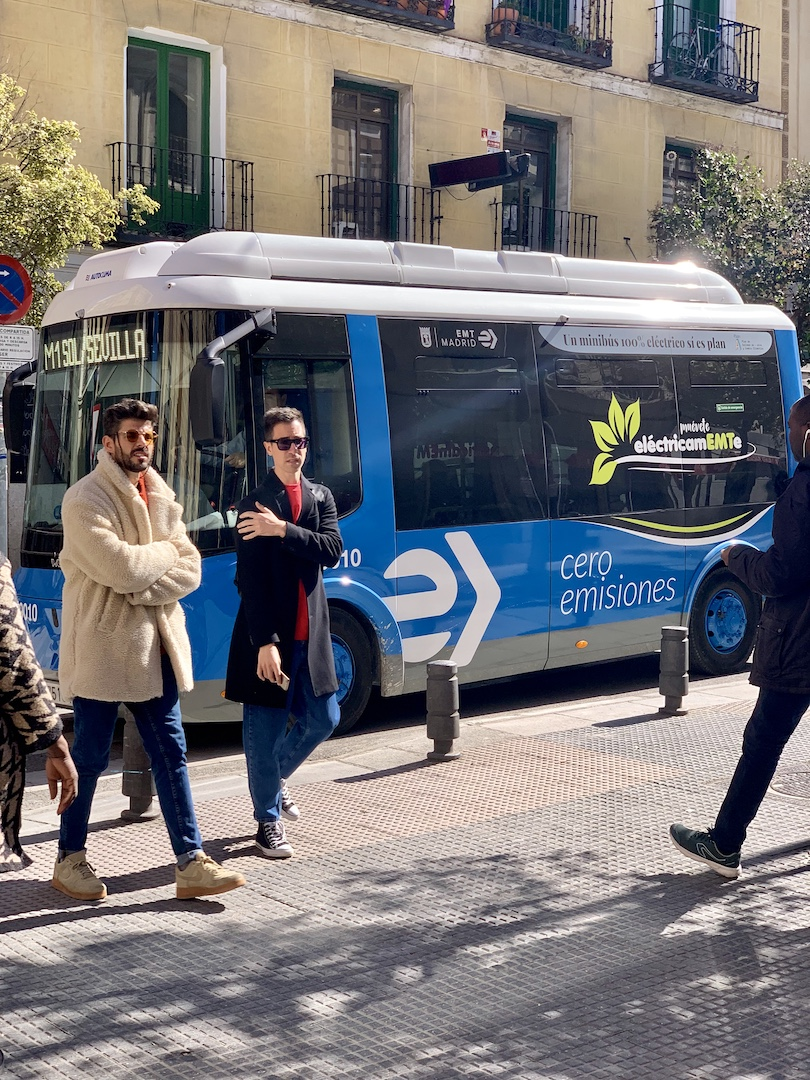

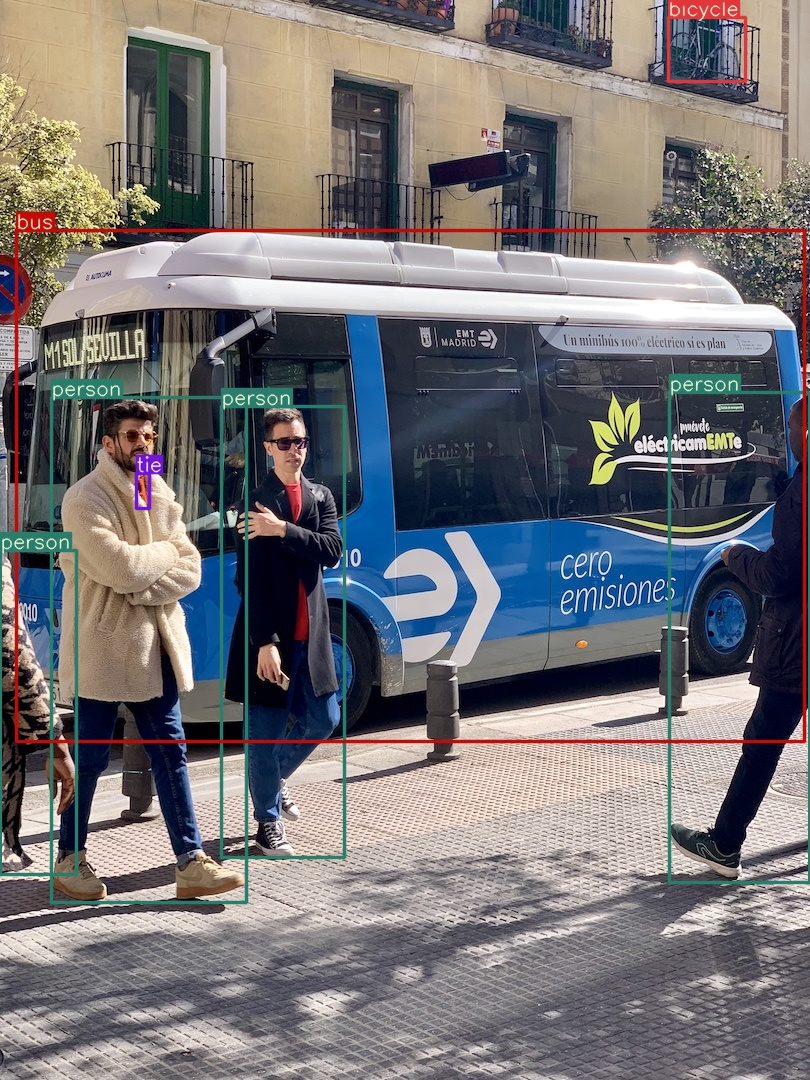

In [10]:
import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread('data/images/test01.jpg')
cv2_imshow(img1)
img2 = cv2.imread('inference/output/test01.jpg')
cv2_imshow(img2)